# **형태소 분석**
txt 파일 꺼삐딴 리(전광용), 화수분(전영택)에서 막대그래프나 3차원 그래프 등 다양한 품사표지의 분포 나타내보기.
전 품사를 다 하지 말고 체언, 용언, 조사별로 각각 비교하기.

In [12]:
!pip install kiwipiepy #kiwi 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 149.9 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.21.0-py3-none-any.whl size=35593192 sha256=301f90d917ecaf1a40e2aa4ff1c58e753a51a388ec236a38cd571a8e626934c3
  Stored in directory: /root/.cache/pip/wheels/b0/16/3d/95053ab5298f0f0f22ffea6de0200b6f24bffb73cab4c1a828
Successfully built kiwipiepy_model


In [6]:
#파일 업로드 -> content에 올라감
from google.colab import files
uploaded = files.upload()

Saving 꺼삐딴 리(전광용).txt to 꺼삐딴 리(전광용).txt
Saving 화수분(전영택).txt to 화수분(전영택).txt


In [43]:
#파일 열기
with open('꺼삐딴 리(전광용).txt', 'r', encoding='utf-8') as f:
    text1 = f.read()

with open('화수분(전영택).txt', 'r', encoding='utf-8') as f:
    text2 = f.read()

In [44]:
from kiwipiepy import Kiwi
kiwi = Kiwi() #키위 가져오기

In [45]:
analysis1 = kiwi.analyze(text1) #파일 분석하기
analysis2 = kiwi.analyze(text2)

In [40]:
def extract_pos(analysis_result, pos_prefix):
    words = []
    for sentence in analysis_result:
        for token in sentence[0]:
            if token.tag.startswith(pos_prefix):
                words.append(token.form)
    return words


In [29]:
cheon1 = extract_pos(analysis1, 'N')  # 체언
yong1 = extract_pos(analysis1, 'V')  # 용언
josa1 = extract_pos(analysis1, 'J')  # 조사

cheon2 = extract_pos(analysis2, 'N')
yong2 = extract_pos(analysis2, 'V')
josa2 = extract_pos(analysis2, 'J')

# 카운트
from collections import Counter
c_cheon1, c_cheon2 = Counter(cheon1), Counter(cheon2)
c_yong1, c_yong2 = Counter(yong1), Counter(yong2)
c_josa1, c_josa2 = Counter(josa1), Counter(josa2)

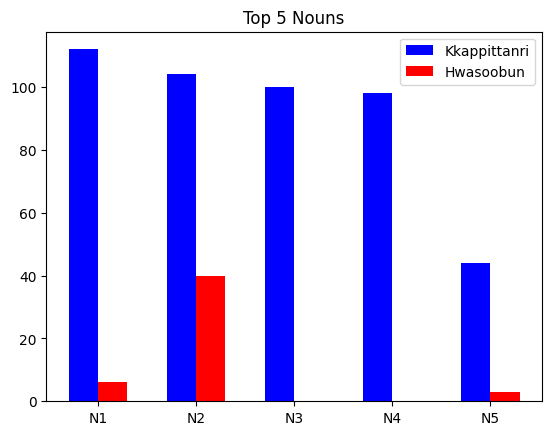

N1 = 그
N2 = 것
N3 = 이인국
N4 = 박사
N5 = 자기


In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 꺼삐딴 리의 체언 상위 5개를 화수분과 비교하기
top = 5
top_cheon = [word for word, _ in c_cheon1.most_common(top)]
labels = [f'N{i+1}' for i in range(top)] #한글 깨져서 영어로 대체
values1 = [c_cheon1[word] for word in top_cheon]
values2 = [c_cheon2[word] for word in top_cheon]

x = np.arange(len(labels))
plt.bar(x - 0.15, values1, width=0.3, color='blue', label='Kkappittanri')
plt.bar(x + 0.15, values2, width=0.3, color='red', label='Hwasoobun')
plt.xticks(x, labels)
plt.title('Top 5 Nouns') #상위 5개 체언
plt.legend()
plt.show()

for tag, word in zip(labels, top_cheon):
    print(f'{tag} = {word}')



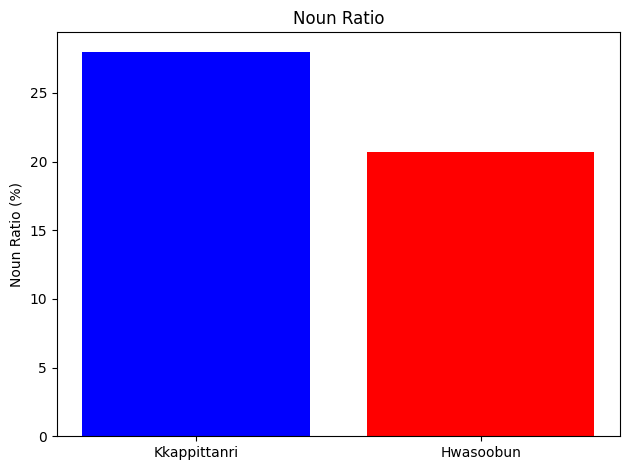

In [42]:
# 전체 token 중 체언의 비율 그래프
import matplotlib.pyplot as plt
import numpy as np

# 전체 token 수
total_tokens1 = sum(len(sent[0]) for sent in analysis1)
total_tokens2 = sum(len(sent[0]) for sent in analysis2)

# 체언 개수
total_cheon1 = sum(c_cheon1.values())
total_cheon2 = sum(c_cheon2.values())

# 비율 계산
rate_cheon1 = total_cheon1 / total_tokens1 * 100
rate_cheon2 = total_cheon2 / total_tokens2 * 100

#그래프
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
texts = ['Kkappittanri', 'Hwasoobun']
rates = [rate_cheon1, rate_cheon2]

plt.bar(x, rates, color=['blue', 'red'])
plt.xticks(x, texts)
plt.ylabel('Noun Ratio (%)')
plt.title('Noun Ratio')
plt.tight_layout()
plt.show()


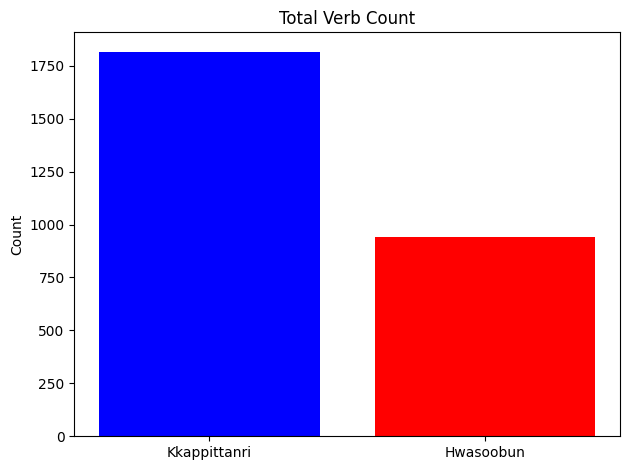

In [37]:
# 전체 용언 개수 그래프

import matplotlib.pyplot as plt
import numpy as np

total_yong1 = sum(c_yong1.values())
total_yong2 = sum(c_yong2.values())

x = np.arange(2)
texts = ['Kkappittanri', 'Hwasoobun']
counts = [total_yong1, total_yong2]

plt.bar(x, counts, color=['blue', 'red'])
plt.xticks(x, texts)
plt.title('Total Verb Count')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

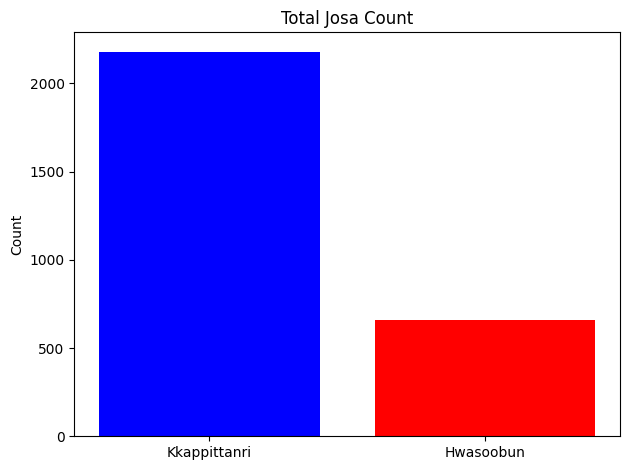

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 전체 조사 개수 비교
total_josa1 = sum(c_josa1.values())
total_josa2 = sum(c_josa2.values())

x = np.arange(2)
texts = ['Kkappittanri', 'Hwasoobun']
counts = [total_josa1, total_josa2]

plt.bar(x, counts, color=['blue', 'red'])
plt.xticks(x, texts)
plt.title('Total Josa Count')
plt.ylabel('Count')
plt.tight_layout()
plt.show()